<a href="https://colab.research.google.com/github/Preyansh17/Pytorch/blob/master/single_layer_nn_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits to @knighterudite https://github.com/knighterudite/ML101/blob/master/one_layer_nn.ipynb

In [87]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv", encoding='utf-16')
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


D = decision attribute (D) with values 0 (unhappy) and 1 (happy)

*   X1 = the availability of information about the city services
*   X2 = the cost of housing
*   X3 = the overall quality of public schools
*   X4 = your trust in the local police
*   X5 = the maintenance of streets and sidewalks
*   X6 = the availability of social community events


Attributes X1 to X6 have values 1 to 5.

In [89]:
target = data[data.columns[0]]
target = np.array(target)
target = torch.from_numpy(target)
target = (torch.unsqueeze(target, 1)).float()
target.size()

torch.Size([143, 1])

We have 143 training examples.

In [90]:
input = data[data.columns[1:]]
input = np.array(input)
input = (torch.from_numpy(input)).float()
input.size()

torch.Size([143, 6])

We have 6 input features ranging from X1 to X6.


In [91]:
model = nn.Sequential(nn.Linear(6,1),nn.Sigmoid())
model

Sequential(
  (0): Linear(in_features=6, out_features=1, bias=True)
  (1): Sigmoid()
)

In [92]:
loss_function = torch.nn.BCELoss()
loss_function

BCELoss()

In [96]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

In [97]:
loss_list = []
epochs = 100

for i in range(epochs):
  pred_out = model(input)
  loss = loss_function(pred_out, target)
  loss_list.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i%10 == 0:
    print("Epoch: {}, Loss: {}".format(i, loss.item()))

Epoch: 0, Loss: 0.6935909986495972
Epoch: 10, Loss: 0.6914792060852051
Epoch: 20, Loss: 0.6894930005073547
Epoch: 30, Loss: 0.6876325607299805
Epoch: 40, Loss: 0.6859011054039001
Epoch: 50, Loss: 0.6842976212501526
Epoch: 60, Loss: 0.6828171014785767
Epoch: 70, Loss: 0.6814525723457336
Epoch: 80, Loss: 0.6801965236663818
Epoch: 90, Loss: 0.6790411472320557


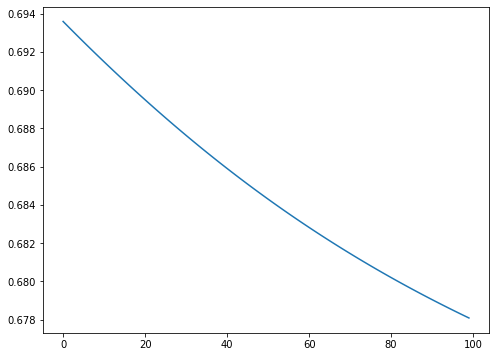

In [98]:
plt.figure(figsize = (8,6))
plt.plot(range(0,100), loss_list)
plt.show()